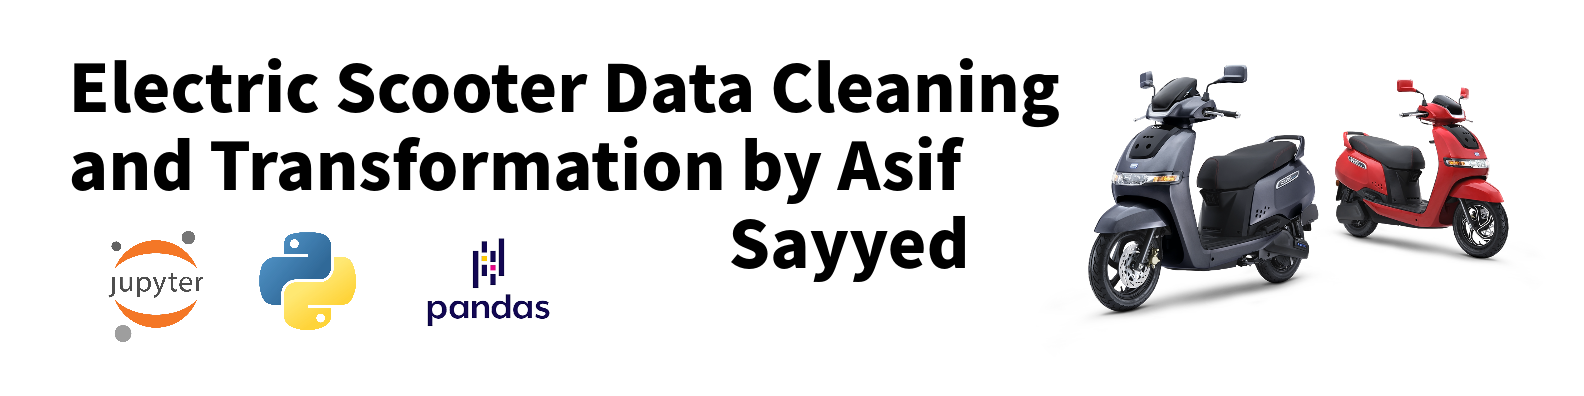

I am going to clean the data as the data we scraped from Flipkart isn't ready to work with. <br>
List of things we need to take care of
- remove '₹' and ',' from the `price` column
- turn the `price` column into numeric datatype
- split `review` column that has data of both number of ratings and number of reviews into two columns

In [2]:
# importing libraries
import pandas as pd

In [3]:
# reading file
df = pd.read_csv('ev_scraped_data.csv')
df.head()

,name,price,rating,review
0,Bounce Infinity E1 Limited Edition Booking for...,"₹1,14,208",4.0,40 Ratings & 12 Reviews
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,"₹91,350",4.4,28 Ratings & 7 Reviews
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,"₹99,950",4.3,594 Ratings & 92 Reviews
3,BGauss BG C12i MAX Booking for Ex-Showroom Pri...,"₹1,26,153",4.2,49 Ratings & 5 Reviews
4,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,"₹1,45,900",4.2,217 Ratings & 39 Reviews


In [4]:
df.tail(10)

,name,price,rating,review
66,OKAYA Faast F3 Booking for Ex-Showroom Price (...,"₹1,24,990",4.0,4 Ratings & 0 Reviews
67,OKAYA Faast F2F Booking for Ex-Showroom Price ...,"₹93,999",4.0,4 Ratings & 0 Reviews
68,OKAYA Faast F2F Booking for Ex-Showroom Price ...,"₹93,999",4.0,4 Ratings & 0 Reviews
69,OKAYA Faast F2F Booking for Ex-Showroom Price ...,"₹93,999",3.6,22 Ratings & 5 Reviews
70,BGauss BG A2 Booking for Ex-Showroom Price (Wi...,"₹71,199",4.0,4 Ratings & 0 Reviews
71,OKAYA ClassIQ Booking for Ex-Showroom Price (w...,"₹74,499",4.0,4 Ratings & 0 Reviews
72,BGauss BG D15 Pro Booking for Ex-Showroom Pric...,"₹1,45,651",3.5,6 Ratings & 4 Reviews
73,BGauss BG B8 Booking for Ex-Showroom Price (Wi...,"₹50,000",3.6,22 Ratings & 5 Reviews
74,OKAYA Faast F3 Booking for Ex-Showroom Price (...,"₹1,24,990",3.7,3 Ratings & 0 Reviews
75,Bounce Infinity E1 Booking for Ex-Showroom Pri...,"₹80,490",4.0,96 Ratings & 31 Reviews


Price data have comma separators and rupees symbol that won't allow us to turn it into numeric type so we need to tackle them first

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    76 non-null     object 
 1   price   76 non-null     object 
 2   rating  76 non-null     float64
 3   review  76 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


We can see that `price` column is object data type and we want it to be int/float to make it useful for analysis

In [6]:
# replacing '₹' (inr symbol) with '' (nothing) and replacing ',' (comma) with '' (nothing)
df['price'] = df['price'].str.replace('₹','').str.replace(',','')

In [7]:
df.price.head()

0    114208
1     91350
2     99950
3    126153
4    145900
Name: price, dtype: object

We have tackled the first issue, moving on to the next

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    76 non-null     object 
 1   price   76 non-null     object 
 2   rating  76 non-null     float64
 3   review  76 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.5+ KB


In [9]:
# converting price into numeric datatype
df.price = pd.to_numeric(df.price)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    76 non-null     object 
 1   price   76 non-null     int64  
 2   rating  76 non-null     float64
 3   review  76 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ KB


Here we have tackled the 2nd problem as well

Now moving on to the 3rd change I would like to make is, make two individual columns for:
- rating count
- review count

as it would give us more room to analyse in future

In [11]:
df[['rating_count','review_count']] = df.review.str.split('&', expand = True)

In [12]:
df.head(3)

,name,price,rating,review,rating_count,review_count
0,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,40 Ratings & 12 Reviews,40 Ratings,12 Reviews
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,91350,4.4,28 Ratings & 7 Reviews,28 Ratings,7 Reviews
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.3,594 Ratings & 92 Reviews,594 Ratings,92 Reviews


now that we have those into two separate columns i.e `rating_count` and `review_count`, we can drop the original column i.e `review`

In [13]:
df = df.drop('review',axis = 1)

In [14]:
df.head(3)

,name,price,rating,rating_count,review_count
0,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,40 Ratings,12 Reviews
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,91350,4.4,28 Ratings,7 Reviews
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.3,594 Ratings,92 Reviews


The column `review` has been dropped

So, since the new columns are called `rating_count` and `review_count`, they would make more sense if they were a numerical datatype
For that
- We need to remove the string part of the records
- Convert their datatypes to numeric

In [15]:
# removing the word 'Ratings' from the records
df.rating_count = df.rating_count.str.replace('Ratings', '')
df.head(3)

,name,price,rating,rating_count,review_count
0,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,40,12 Reviews
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,91350,4.4,28,7 Reviews
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.3,594,92 Reviews


In [16]:
# removing the word 'Reviews' from the records
df.review_count = df.review_count.str.replace("Reviews", '')
df.head(3)

,name,price,rating,rating_count,review_count
0,Bounce Infinity E1 Limited Edition Booking for...,114208,4.0,40,12
1,Joy e-bike Wolf Eco Booking for Ex-Showroom Pr...,91350,4.4,28,7
2,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,4.3,594,92


That takes care of the string within the record, we heading towards changing it's datatype

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76 non-null     object 
 1   price         76 non-null     int64  
 2   rating        76 non-null     float64
 3   rating_count  76 non-null     object 
 4   review_count  76 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ KB


In [18]:
df.rating_count = df.rating_count.str.strip()

In [19]:
df.rating_count = pd.to_numeric(df.rating_count)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76 non-null     object 
 1   price         76 non-null     int64  
 2   rating        76 non-null     float64
 3   rating_count  76 non-null     int64  
 4   review_count  76 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ KB


In [21]:
pd.to_numeric(df.review_count)

ValueError: Unable to parse string " 12 " at position 0

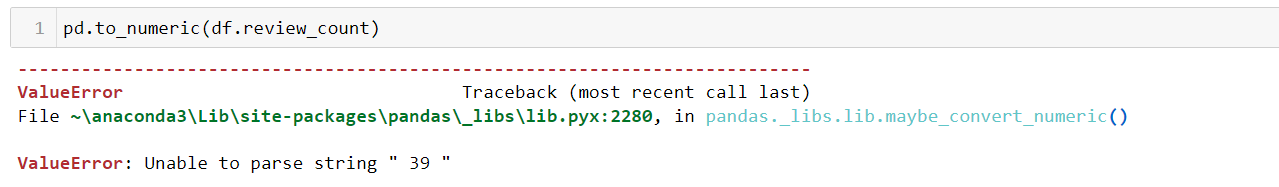

The above is an image of the error that I encountered while changing the datatype of the `review_count` column <br>
and as you can see in the error message, it shows white spaces before and after the number. <br>
hence using the `strip()` function should help

In [22]:
df.review_count = df.review_count.str.strip()

In [23]:
df.review_count = pd.to_numeric(df.review_count)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76 non-null     object 
 1   price         76 non-null     int64  
 2   rating        76 non-null     float64
 3   rating_count  76 non-null     int64  
 4   review_count  76 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


I have made both `rating_count` and `review_count` into numeric datatype

Finally, Done with all the data cleaning and transformations we needed to make <br>
Now I will export the cleaned dataset into a CSV file

In [25]:
df.to_csv('ev_cleaned_data.csv', ',', index = False, encoding= 'UTF-8')

In [27]:
# reading the file to make sure everything exported properly
pd.read_csv('ev_cleaned_data.csv').sample(10)

,name,price,rating,rating_count,review_count
52,OKAYA FAAST F4 Booking for Ex-Showroom Price (...,132990,4.2,5,1
48,Joy e-bike Gen Next Nanu Eco Booking for Ex-Sh...,88200,4.0,40,12
26,Joy e-bike Gen Next Nanu Eco Booking for Ex-Sh...,88200,3.5,6,4
24,OKAYA FAAST F4 Booking for Ex-Showroom Price (...,132990,4.2,5,1
21,OKAYA Faast F2B Booking for Ex-Showroom Price ...,99950,3.9,12,5
57,Ampere Primus Booking for Ex-Showroom Price (W...,146355,3.6,22,5
27,OKAYA Freedum LI-2 Booking for Ex-Showroom Pri...,74899,3.5,6,4
16,VIDA Powered by Hero V1 Pro Booking for Ex-Sho...,145900,4.0,16,1
61,OKAYA Faast F3 Booking for Ex-Showroom Price (...,124990,3.7,3,0
47,OKAYA Freedum LI-2 Booking for Ex-Showroom Pri...,74899,4.2,49,5


<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>